In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import pulp
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value
import networkx as nx

In [19]:
n_point=25
np.random.seed(2002)

df=pd.DataFrame({
    'x': np.random.randint(0, 100, n_point),
    'y': np.random.randint(0, 100, n_point),
})


df.iloc[0]['x']=0
df.iloc[0]['y']=0

df

,x,y
0,0,0
1,18,1
2,8,46
3,73,72
4,44,41
5,56,26
6,13,66
7,87,39
8,4,63
9,25,32


In [20]:
d=distance_matrix(df[['x', 'y']].values, df[['x', 'y']].values, p=2)  # 1=manhattan distance, 2=euclidean distance
d

array([[  0.        ,  18.02775638,  46.69047012, 102.53292154,
         60.14149982,  61.74139616,  67.26812024,  95.34149149,
         63.12685641,  40.60788101, 107.56393448,  57.03507693,
         85.47514259,  82.03657721,  38.01315562,  26.92582404,
        104.89041901,  86.97700846,  92.84934033,  94.5568612 ,
         80.50465825,  65.06919394,  80.0624756 , 100.        ,
        110.60289327],
       [ 18.02775638,   0.        ,  46.09772229,  89.81091248,
         47.70744177,  45.48626166,  65.19202405,  78.77182237,
         63.56099433,  31.78049716,  94.36630755,  39.01281841,
         69.63476143,  69.4046108 ,  30.2654919 ,  27.31300057,
         93.1933474 ,  69.64194139,  79.39773297,  77.25283166,
         79.51100553,  53.33854141,  72.53275122,  82.54089895,
         99.84988733],
       [ 46.69047012,  46.09772229,   0.        ,  70.00714249,
         36.34556369,  52.        ,  20.61552813,  79.30952024,
         17.4642492 ,  22.02271555,  75.96051606,  65.8559

In [21]:
d[0][1]

18.027756377319946

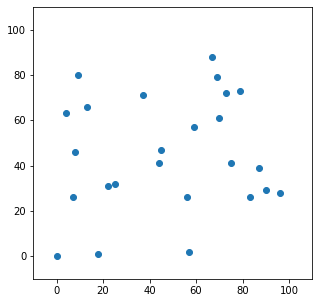

In [22]:
plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'])
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.show()

In [30]:
model=LpProblem('tsp_mip', LpMinimize)

In [31]:
x=LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
x

{(0, 0): x_(0,_0),
 (0, 1): x_(0,_1),
 (0, 2): x_(0,_2),
 (0, 3): x_(0,_3),
 (0, 4): x_(0,_4),
 (0, 5): x_(0,_5),
 (0, 6): x_(0,_6),
 (0, 7): x_(0,_7),
 (0, 8): x_(0,_8),
 (0, 9): x_(0,_9),
 (0, 10): x_(0,_10),
 (0, 11): x_(0,_11),
 (0, 12): x_(0,_12),
 (0, 13): x_(0,_13),
 (0, 14): x_(0,_14),
 (0, 15): x_(0,_15),
 (0, 16): x_(0,_16),
 (0, 17): x_(0,_17),
 (0, 18): x_(0,_18),
 (0, 19): x_(0,_19),
 (0, 20): x_(0,_20),
 (0, 21): x_(0,_21),
 (0, 22): x_(0,_22),
 (0, 23): x_(0,_23),
 (0, 24): x_(0,_24),
 (1, 0): x_(1,_0),
 (1, 1): x_(1,_1),
 (1, 2): x_(1,_2),
 (1, 3): x_(1,_3),
 (1, 4): x_(1,_4),
 (1, 5): x_(1,_5),
 (1, 6): x_(1,_6),
 (1, 7): x_(1,_7),
 (1, 8): x_(1,_8),
 (1, 9): x_(1,_9),
 (1, 10): x_(1,_10),
 (1, 11): x_(1,_11),
 (1, 12): x_(1,_12),
 (1, 13): x_(1,_13),
 (1, 14): x_(1,_14),
 (1, 15): x_(1,_15),
 (1, 16): x_(1,_16),
 (1, 17): x_(1,_17),
 (1, 18): x_(1,_18),
 (1, 19): x_(1,_19),
 (1, 20): x_(1,_20),
 (1, 21): x_(1,_21),
 (1, 22): x_(1,_22),
 (1, 23): x_(1,_23),
 (1, 24): x

In [32]:
for i in range(n_point):
    model+=x[i, i]==0

In [33]:
for i in range(n_point):
    model+=lpSum(x[j, i] for j in range(n_point)) == 1  # ขาเข้า visited ทีเดียว
    model+=lpSum(x[i, j] for j in range(n_point)) == 1  # ขาออก visited ทีเดียว

In [34]:
model+=lpSum(x[i, j]*d[i][j] for i in range(n_point) for j in range(n_point))
model

tsp_mip:
MINIMIZE
18.027756377319946*x_(0,_1) + 107.56393447619885*x_(0,_10) + 57.0350769263968*x_(0,_11) + 85.47514258543241*x_(0,_12) + 82.03657720797473*x_(0,_13) + 38.01315561749642*x_(0,_14) + 26.92582403567252*x_(0,_15) + 104.89041900955492*x_(0,_16) + 86.97700845625813*x_(0,_17) + 92.84934033152847*x_(0,_18) + 94.5568612000208*x_(0,_19) + 46.69047011971501*x_(0,_2) + 80.50465825031493*x_(0,_20) + 65.06919393998976*x_(0,_21) + 80.06247560499239*x_(0,_22) + 100.0*x_(0,_23) + 110.60289327137876*x_(0,_24) + 102.53292154230269*x_(0,_3) + 60.14149981501958*x_(0,_4) + 61.741396161732524*x_(0,_5) + 67.26812023536856*x_(0,_6) + 95.34149149242423*x_(0,_7) + 63.12685640834652*x_(0,_8) + 40.607881008493905*x_(0,_9) + 18.027756377319946*x_(1,_0) + 94.36630754670864*x_(1,_10) + 39.01281840626232*x_(1,_11) + 69.63476143421474*x_(1,_12) + 69.40461079784254*x_(1,_13) + 30.265491900843113*x_(1,_14) + 27.313000567495326*x_(1,_15) + 93.1933474020544*x_(1,_16) + 69.6419413859206*x_(1,_17) + 79.39773

In [101]:
status=model.solve()
status

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/panithi/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/6c3299a24a8a4e27a160fa73f454b9b7-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/6c3299a24a8a4e27a160fa73f454b9b7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 123 COLUMNS
At line 5323 RHS
At line 5442 BOUNDS
At line 6068 ENDATA
Problem MODEL has 118 rows, 625 columns and 3349 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 421.62 - 0.00 seconds
Cgl0002I 25 variables fixed
Cgl0004I processed model has 78 rows, 600 columns (600 integer (600 of which binary)) and 2858 elements
Cbc0038I Initial state - 34 integers unsatisfied sum - 17
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 918.232 iterations 104
Cbc0038I Solution found of 918.232
Cbc0038I Before mini branch and bound, 549 integer

1

In [102]:
model.objective.value()

422.6006743436187

### เกิด subtour! รันไปเรื่อย ๆ จนกว่าจะไม่มี subtour แล้ว ถ้ากำจัด subtour ตอนแรกจน. subtour จะเป็น exponential ของจน.  จุดที่เรามีทำให้ size ของปัญหามันโต ดังนั้นการค่อย ๆ เพิ่ม constraint จะ efficient ว่าในการ solve

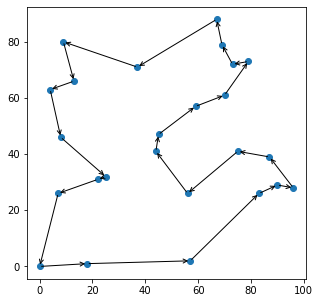

In [103]:
plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'])

routes=[(i, j) for i in range(n_point) for j in range(n_point) if x[i, j].value() == 1]
arrowprops=dict(arrowstyle='->')
for i, j in routes:
    plt.annotate('', xy=[df.iloc[j]['x'], df.iloc[j]['y']], xytext=[df.iloc[i]['x'], df.iloc[i]['y']], arrowprops=arrowprops)

plt.show()

In [104]:
G=nx.Graph()
G.add_nodes_from(range(n_point))

In [105]:
for e in routes:
    G.add_edge(e[0], e[1])

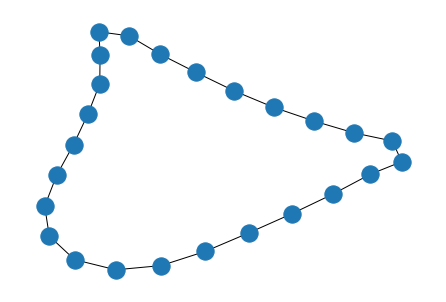

In [106]:
nx.draw(G)

In [107]:
nr=nx.number_connected_components(G)
print(nr)

1


In [108]:
# eliminate subtours
if nr>1:
    print('has subgraph')
    components=nx.connected_components(G)
    for c in components:
        print(c)
        model+=lpSum(x[i, j] for i in c for j in c if i!=j) <= len(c)-1
else:
    print('no subgraph')

no subgraph
